# Solving Linear Equations Using Substitution and Elimination

## 📚 Learning Objectives

By completing this notebook, you will:
- Implement substitution and elimination techniques for solving linear equations
- Solve systems of linear equations using Python/NumPy
- Compare different methods for solving linear systems
- Apply these techniques to ML-related problems

## 🔗 Prerequisites

- ✅ Understanding of linear algebra basics
- ✅ Python and NumPy knowledge

---

## Official Structure Reference

This notebook covers practical activities from **Course 03, Unit 1**:
- Implementing substitution/elimination techniques for solving linear equations
- **Source:** `DETAILED_UNIT_DESCRIPTIONS.md` - Unit 1 Practical Content

---

## Introduction

**Substitution and elimination** are fundamental techniques for solving systems of linear equations. In machine learning, these methods are used in solving optimization problems and understanding model parameters.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

print("✅ Libraries imported!")
print("\nSolving Linear Equations Using Substitution and Elimination")
print("=" * 60)


✅ Libraries imported!

Solving Linear Equations Using Substitution and Elimination


## Part 1: Substitution Method


In [2]:
print("=" * 60)
print("Part 1: Substitution Method")
print("=" * 60)

# Example: Solve 2x + y = 5, x - y = 1
# Step 1: From second equation: x = 1 + y
# Step 2: Substitute into first: 2(1 + y) + y = 5
# Step 3: Solve: 2 + 2y + y = 5 => 3y = 3 => y = 1
# Step 4: Substitute back: x = 1 + 1 = 2

def substitution_method(eq1, eq2):
    """
    Solve system of 2 linear equations using substitution.
    eq1: [a1, b1, c1] for a1*x + b1*y = c1
    eq2: [a2, b2, c2] for a2*x + b2*y = c2
    """
    a1, b1, c1 = eq1
    a2, b2, c2 = eq2
    
    # Solve eq2 for x: x = (c2 - b2*y) / a2 (if a2 != 0)
    if a2 != 0:
        # x = (c2 - b2*y) / a2
        # Substitute into eq1: a1*(c2 - b2*y)/a2 + b1*y = c1
        # Simplify: (a1*c2)/a2 - (a1*b2*y)/a2 + b1*y = c1
        # y*(b1 - a1*b2/a2) = c1 - a1*c2/a2
        y = (c1 - a1*c2/a2) / (b1 - a1*b2/a2)
        x = (c2 - b2*y) / a2
    else:
        # If a2 == 0, solve for y first
        y = c2 / b2 if b2 != 0 else 0
        x = (c1 - b1*y) / a1
    
    return x, y

# Test with: 2x + y = 5, x - y = 1
# Expected: x = 2, y = 1
eq1 = [2, 1, 5]  # 2x + y = 5
eq2 = [1, -1, 1]  # x - y = 1

x, y = substitution_method(eq1, eq2)
print(f"\nExample: 2x + y = 5, x - y = 1")
print(f"Solution: x = {x:.2f}, y = {y:.2f}")
print(f"Verification:")
print(f"  2({x:.2f}) + {y:.2f} = {2*x + y:.2f} (expected 5.00)")
print(f"  {x:.2f} - {y:.2f} = {x - y:.2f} (expected 1.00)")

print("\n✅ Substitution method implemented!")


Part 1: Substitution Method

Example: 2x + y = 5, x - y = 1
Solution: x = 2.00, y = 1.00
Verification:
  2(2.00) + 1.00 = 5.00 (expected 5.00)
  2.00 - 1.00 = 1.00 (expected 1.00)

✅ Substitution method implemented!


## Part 2: Elimination Method (Gaussian Elimination)


In [3]:
print("\n" + "=" * 60)
print("Part 2: Elimination Method (Gaussian Elimination)")
print("=" * 60)

def gaussian_elimination(A, b):
    """
    Solve Ax = b using Gaussian elimination.
    A: coefficient matrix (n x n)
    b: constant vector (n x 1)
    Returns: solution vector x
    """
    # Create augmented matrix
    n = len(b)
    aug = np.hstack([A.astype(float), b.reshape(-1, 1)])
    
    print(f"\nAugmented matrix:\n{aug}")
    
    # Forward elimination
    for i in range(n):
        # Find pivot
        max_row = i
        for k in range(i+1, n):
            if abs(aug[k, i]) > abs(aug[max_row, i]):
                max_row = k
        aug[[i, max_row]] = aug[[max_row, i]]
        
        # Make diagonal element 1 and eliminate below
        pivot = aug[i, i]
        if abs(pivot) < 1e-10:
            raise ValueError("Matrix is singular or nearly singular")
        
        aug[i] = aug[i] / pivot
        
        for k in range(i+1, n):
            factor = aug[k, i]
            aug[k] = aug[k] - factor * aug[i]
    
    print(f"\nAfter forward elimination (row echelon form):\n{aug}")
    
    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = aug[i, -1] - np.dot(aug[i, i+1:n], x[i+1:n])
    
    return x

# Test with: 2x + y = 5, x - y = 1
A = np.array([[2, 1],
              [1, -1]])
b = np.array([5, 1])

x = gaussian_elimination(A, b)
print(f"\nSolution: x = {x[0]:.2f}, y = {x[1]:.2f}")

# Verify
print(f"\nVerification: Ax = {A @ x} (expected {b})")

print("\n✅ Gaussian elimination implemented!")



Part 2: Elimination Method (Gaussian Elimination)

Augmented matrix:
[[ 2.  1.  5.]
 [ 1. -1.  1.]]

After forward elimination (row echelon form):
[[ 1.   0.5  2.5]
 [-0.   1.   1. ]]

Solution: x = 2.00, y = 1.00

Verification: Ax = [5. 1.] (expected [5 1])

✅ Gaussian elimination implemented!


## Part 3: Using NumPy for Linear Systems


In [4]:
print("\n" + "=" * 60)
print("Part 3: Using NumPy for Linear Systems")
print("=" * 60)

# NumPy provides efficient methods for solving linear systems
A = np.array([[2, 1],
              [1, -1]])
b = np.array([5, 1])

# Method 1: Using np.linalg.solve (recommended)
x_solve = np.linalg.solve(A, b)
print(f"\nUsing np.linalg.solve:")
print(f"Solution: x = {x_solve[0]:.2f}, y = {x_solve[1]:.2f}")

# Method 2: Using inverse matrix (less efficient)
A_inv = np.linalg.inv(A)
x_inv = A_inv @ b
print(f"\nUsing inverse matrix:")
print(f"Solution: x = {x_inv[0]:.2f}, y = {x_inv[1]:.2f}")

# Method 3: Using scipy.linalg.solve
x_scipy = linalg.solve(A, b)
print(f"\nUsing scipy.linalg.solve:")
print(f"Solution: x = {x_scipy[0]:.2f}, y = {x_scipy[1]:.2f}")

print(f"\n✅ All methods give the same result!")

# Example: 3x3 system
print("\n" + "-" * 60)
print("Example: 3x3 System")
print("-" * 60)
A3 = np.array([[2, 1, -1],
               [-3, -1, 2],
               [-2, 1, 2]])
b3 = np.array([8, -11, -3])

x3 = np.linalg.solve(A3, b3)
print(f"\nSystem:")
print("  2x + y - z = 8")
print("  -3x - y + 2z = -11")
print("  -2x + y + 2z = -3")
print(f"\nSolution: x = {x3[0]:.2f}, y = {x3[1]:.2f}, z = {x3[2]:.2f}")
print(f"Verification: A @ x = {A3 @ x3} (expected {b3})")



Part 3: Using NumPy for Linear Systems

Using np.linalg.solve:
Solution: x = 2.00, y = 1.00

Using inverse matrix:
Solution: x = 2.00, y = 1.00

Using scipy.linalg.solve:
Solution: x = 2.00, y = 1.00

✅ All methods give the same result!

------------------------------------------------------------
Example: 3x3 System
------------------------------------------------------------

System:
  2x + y - z = 8
  -3x - y + 2z = -11
  -2x + y + 2z = -3

Solution: x = 2.00, y = 3.00, z = -1.00
Verification: A @ x = [  8. -11.  -3.] (expected [  8 -11  -3])


## Part 4: Application to ML Problems



Part 4: Application to ML Problems

Linear Regression Normal Equations:
------------------------------------------------------------
Design matrix X:
[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]

X^T * X:
[[ 5. 15.]
 [15. 55.]]
X^T * y:
[20. 66.]

Solution: w0 (bias) = 2.20, w1 (slope) = 0.60
Model: y = 2.20 + 0.60*x


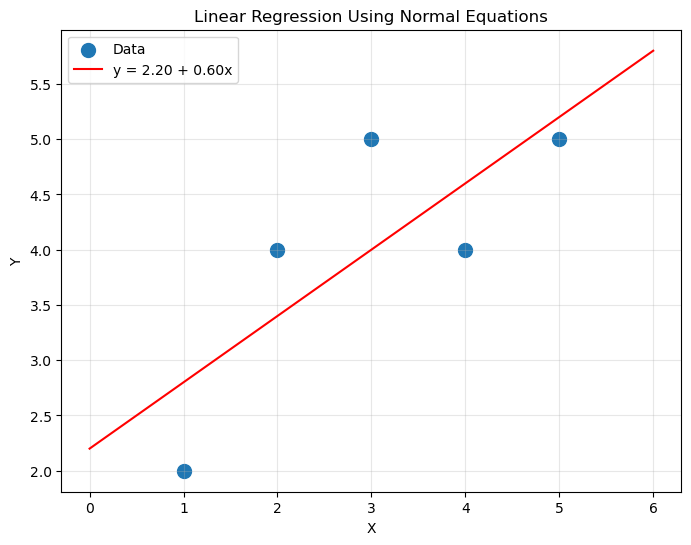


✅ Linear regression solved using linear equation solving!


In [5]:
print("\n" + "=" * 60)
print("Part 4: Application to ML Problems")
print("=" * 60)

# Example: Linear regression normal equations
# For y = w0 + w1*x, we solve (X^T * X) * w = X^T * y
print("\nLinear Regression Normal Equations:")
print("-" * 60)

# Sample data
X_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([2, 4, 5, 4, 5])

# Create design matrix with bias term
X = np.vstack([np.ones(len(X_data)), X_data]).T

# Normal equations: (X^T * X) * w = X^T * y
A_norm = X.T @ X
b_norm = X.T @ y_data

print(f"Design matrix X:\n{X}")
print(f"\nX^T * X:\n{A_norm}")
print(f"X^T * y:\n{b_norm}")

# Solve for weights
w = np.linalg.solve(A_norm, b_norm)
print(f"\nSolution: w0 (bias) = {w[0]:.2f}, w1 (slope) = {w[1]:.2f}")
print(f"Model: y = {w[0]:.2f} + {w[1]:.2f}*x")

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_data, y_data, label='Data', s=100)
x_line = np.linspace(0, 6, 100)
y_line = w[0] + w[1] * x_line
plt.plot(x_line, y_line, 'r-', label=f'y = {w[0]:.2f} + {w[1]:.2f}x')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Using Normal Equations')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n✅ Linear regression solved using linear equation solving!")


## Summary

### Key Concepts:
1. **Substitution Method**: Solve one equation for a variable, substitute into other equation
2. **Elimination Method (Gaussian Elimination)**: Transform system to row echelon form, then back substitute
3. **NumPy Methods**: Use `np.linalg.solve()` for efficient solving of linear systems
4. **ML Applications**: Linear regression normal equations, parameter solving

### Best Practices:
- Use NumPy's `linalg.solve()` for numerical stability
- Avoid computing inverse explicitly (use solve instead)
- Check for singular matrices (determinant near zero)
- Verify solutions by checking Ax = b

### Applications:
- Linear regression (normal equations)
- Optimization problems
- Parameter estimation
- Neural network weight solving

**Reference:** Course 03, Unit 1: "Linear Algebra for Machine Learning" - Solving linear equations practical content
